## 3 Linear regression

### 3.1.2 Assessing the accuaracy of the CoefficientsEstimates

Let's validate with an example the residual standard error.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [74]:
np.random.seed(42) # for reproducibility

First generate one thousand data points, this will represent the population.
Data is generated with random gaussian noise.
Real linear function is given by y = 7.6X -3.3

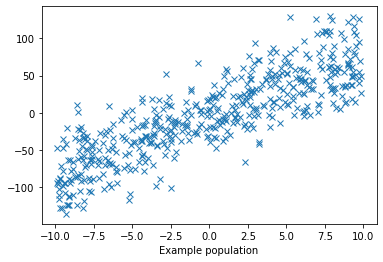

In [75]:
#Number of data points
n = 500
X = np.random.uniform(-10,10, n) 
noise = np.random.normal(0, 30, n) # Gaussian distribution

#This are the real parameters
true_beta1, true_beta0 = 7.6, -3.3

#Our true function
# y = beta1 * x + beta0 + ε
y = true_beta1 * X + true_beta0 + noise

pop = np.array([X, y])

plt.plot(X, y, 'x');
plt.xlabel('Example population')
plt.show()

To compute the standard error assosiated to the coefitients $\beta_0$ and $\beta_1$ we have the following formulas:

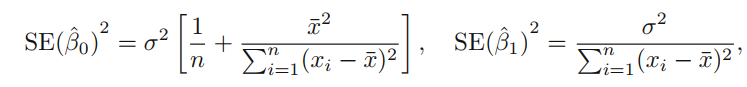

Where $\sigma^2$ = Var($\epsilon$). However, in a normal problem we don't have acces to $\epsilon$, so we have to calculate using the residual error using the next formlas:

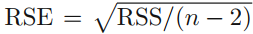 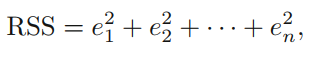 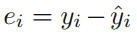

Let's use our generated data, then take N samples K times and check if our RSE estmiate is near to Var($\epsilon$)

#### Plot test data

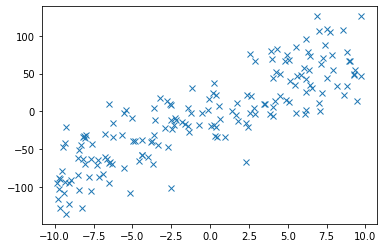

In [76]:
#divide train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,test_size=0.35)

testSampleSize = y_train.size

plt.plot(X_test, y_test, 'x');

#### Use sklearn to train model using training data

In [77]:
#use scikit learn to calculate the coefficients
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

beta0 = linr.intercept_
beta1 = linr.coef_[0]

print(beta0, beta1)

[-2.45681807] [7.80590072]


Original coefficients are w = 7.3  and b = -3.3. Now lets calculate RSE using above formula. Remember our sample number n is (500 * 0.65) = 325

#### Plot traning data with function obtained from train data

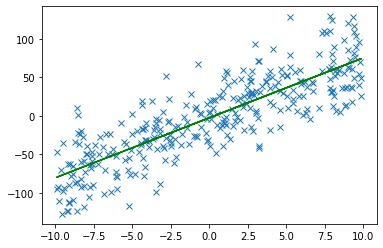

In [78]:
yplot = X_train * beta1 + beta0

plt.plot(X_train, y_train, 'x');
plt.plot(X_train, yplot, 'g')
plt.show()

Line is just in the middle of data. This means that our error has zero mean as shown below.

#### Analyzing error (noise) that was added during creation of data

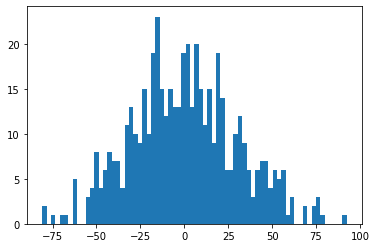

In [79]:
#Plot error distribution
plt.hist(noise, bins=70)
plt.show()

As expected error (noise) has a normal distribution.

In [80]:
#Error mean
np.mean(noise)

0.2285955628068237

Since error has a normal distribution, is expected to have a near zero mean.

In [81]:
#Error standard deviation
np.std(noise)

30.181637609126565

In [82]:
#Error vriance
np.var(noise)

910.9312487686431

#### Calculate residual sum of squares amd residual standard error

In [83]:
#First evaluate the model with calculated coeficients, using the sample data.
yHat = X_train * beta1 + beta0

#Calculate error using our calculated Y and comparing with true Y
error = y_train - yHat

#Calculate RSS
rss = np.square(error)
rss = np.sum(rss)

#Now calculate RSE
rse = math.sqrt(rss / (testSampleSize-2))

print(f'RSS: {rss}, RSE: {rse}')

RSS: 291613.3529538901, RSE: 30.047091674960804


#### Why Var(error) is approximately equal to RSE?

To answer this question, first lets plot error calculated above.

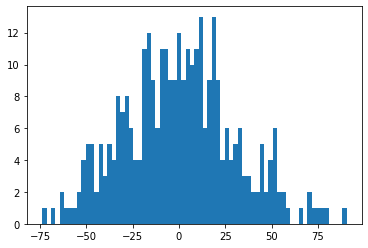

In [84]:
plt.hist(error, bins=70)
plt.show()

As we can see, we got a very similar error distribution than our error(noise) introduced at the begigning.
Having this aproximation we can calculate RSE, which is a very similar equation than varaince, but what does it mean (n - 2)?

#### Calculate standard error for beta1

In [85]:
#Calculate standard error for beta_1
X_train_median = np.median(X_train)

x_sq_sum = X_train - X_train_median
x_sq_sum = np.square(x_sq_sum)
x_sq_sum = np.sum(x_sq_sum)

beta1_SE = (rse ** 2) / x_sq_sum
beta1_SE = math.sqrt(beta1_SE)
beta1_SE

0.28108885303912184

#### Calculate standard error for beta0

In [87]:
#Calculate standard error for beta_0
beta0_SE = (X_train_median ** 2) / x_sq_sum
beta0_SE = (rse ** 2) * ((1/testSampleSize) + beta0_SE)
beta0_SE = math.sqrt(beta0_SE)
beta0_SE

1.6750273560488353

In [88]:
print(f'Real coeficients are beta0: {true_beta0} and beta1: {true_beta1}')
print(f'Calculated coeficients using sample data are beta0: {beta0} and beta1: {beta1}')
print(f'For beta1, there is a 95% confidence that value is between: {beta1 - (2 * beta1_SE)} and {beta1 + (2 * beta1_SE)}')
print(f'For beta0, there is a 95% confidence that value is between: {beta0 - (2 * beta0_SE)} and {beta0 + (2 * beta0_SE)}')

Real coeficients are beta0: -3.3 and beta1: 7.6
Calculated coeficients using sample data are beta0: [-2.45681807] and beta1: [7.80590072]
For beta1, there is a 95% confidence that value is between: [7.24372301] and [8.36807842]
For beta0, there is a 95% confidence that value is between: [-5.80687278] and [0.89323664]


#### Next steps

For beta0, conficence intervals seems to be hight, is it correct?
- Use data from book and try to reproduce their values